# Question 1


Exploring the dataset and importing the necessary libraries to preprocess the data

In [207]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
#Load the data
df = pd.read_csv("dataset.csv", sep='\t')
df.isnull().sum()
print(df.head())

   feature1  feature2  feature3  feature4  labels
0       4.6       3.4       1.4       0.3     0.0
1       6.4       2.8       NaN       2.1     NaN
2       6.3       3.3       6.0       2.5     2.0
3       4.7       3.2       1.3       0.2     0.0
4       6.4       2.9       4.3       1.3     1.0


In [209]:
df['labels'].unique()

array([ 0., nan,  2.,  1.])

In [210]:
df['labels'].value_counts()

1.0    50
0.0    50
2.0    20
Name: labels, dtype: int64

Exploratory Data Analysis

In [211]:
#Elaborate the data statistics
print(df.describe())

         feature1    feature2    feature3    feature4      labels
count  144.000000  150.000000  144.000000  150.000000  120.000000
mean     5.806250    3.054000    3.684722    1.198667    0.750000
std      0.813197    0.433594    1.759343    0.763161    0.724714
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.500000    0.300000    0.000000
50%      5.750000    3.000000    4.200000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    1.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


As there are only 120 labels available so it is better to remove the labels which have no information, If the labels were present, I would have imputed the data

In [212]:
my_dataframe = df[df.labels.isnull()==False]

In [213]:
print(my_dataframe.describe())

         feature1    feature2    feature3   feature4      labels
count  120.000000  120.000000  120.000000  120.00000  120.000000
mean     5.652500    3.065000    3.327500    0.99500    0.750000
std      0.770786    0.465381    1.704022    0.70792    0.724714
min      4.300000    2.000000    1.000000    0.10000    0.000000
25%      5.000000    2.800000    1.500000    0.20000    0.000000
50%      5.600000    3.000000    3.900000    1.15000    1.000000
75%      6.200000    3.400000    4.625000    1.50000    1.000000
max      7.700000    4.400000    6.900000    2.50000    2.000000


Now, I split the data into training and test set to train

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
y=my_dataframe.labels
X=my_dataframe.drop('labels',axis=1)
#scaling data
#X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) 

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#scaling data bw 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)  # or: fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
X_train = scaler.transform(X_train)  # or: fit_transform(X_train)
X_test = scaler.transform(X_test)

(96, 4)
(96,)
(24, 4)
(24,)


# CLUSTERING

We can visualize the data,

C:\Users\iKhan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


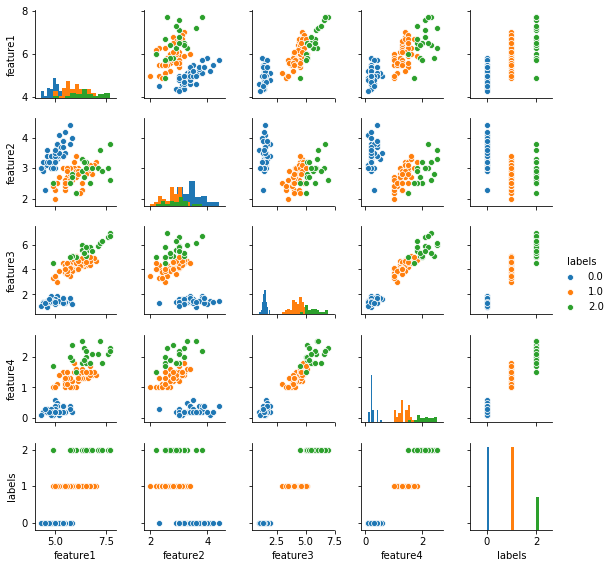

In [215]:
sns.pairplot(df, hue="labels", diag_kind="hist", size=1.6);

I have used Kmeans and GMM clustering technique to show the difference between two clustering models

In [216]:
# now let's try Kmeans clustering, K means is an iterative clustering algorithm that aims to find local maxima 
# in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, 
# we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. 
from sklearn import metrics
kmeans = KMeans(n_clusters=3)
kmeansy_predict = kmeans.fit(X_train).predict(X_test)
print(metrics.accuracy_score(y_test,kmeansy_predict))

0.08333333333333333


In [220]:
# now let's try GMM clustering, 
from sklearn.mixture import GaussianMixture

In [221]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [222]:
gmm.y = gmm.predict(X_test)
print(metrics.accuracy_score(y_test,gmm.y))

0.5833333333333334


# Conclusion

The biggest disadvantage is that K-Means requires you to pre-specify the number of clusters,  makes hard assignments to clusters, but is very fast (linear in number of features and data points). GMM makes 'soft' assignments to clusters, but is much slower than k-means for large datasets.

In [223]:
 #you can't just compare the label Id with the cluster numbers, because they are both arbitrarily assigned integers.

from sklearn.metrics.cluster import adjusted_rand_score

# first let's see how the k-means clustering did - 
score = adjusted_rand_score(y_test, kmeansy_predict)
score

0.8197747183979974

In [224]:
# now the GMM clustering - 
score = adjusted_rand_score(y_test, gmm.y)
score

0.9249061326658322

so It is clear the GMM makes the better cluster assignments

# Question 2:

It appears as it is a problem with Multivariate linear regression with multiple outputs.
The covariance matrix shows that the features are negatively correlated with each other
The cross variance matrix shows that the first two features are positively correlated with the output 
but the later features are negatively correlated with the output.

Rather than mapping the predictor independently to the output, a better approach is to use multi-tasking method.
The output is a matrix instead of a vector with the dimensions of features to weights. In case of a matrix,
we have to regularize with L1, L2  or both as in elastic-net.